In [1]:
!pip install yellowbrick

### CHATBOT for DEPLOYMENT (does small talk and instructions for doing Summary)

In [2]:
import nltk
from nltk.chat.util import Chat, reflections

#### Own dictionary with responses I want. Basically reflections

In [3]:
reflections = {
  "i am"       : "you are",
  "i was"      : "you were",
  "i"          : "you",
  "i'm"        : "you are",
  "i'd"        : "you would",
  "i've"       : "you have",
  "i'll"       : "you will",
  "my"         : "your",
  "you are"    : "I am",
  "you were"   : "I was",
  "you've"     : "I have",
  "you'll"     : "I will",
  "your"       : "my",
  "yours"      : "mine",
  "you"        : "me",
  "me"         : "you"
}

#### Creating rules for the Chatbot

In [4]:
pairs = [
    [
        r"my name is (.*)",
        ["Hello %1, How are you today ?",]
    ],
    [
        r"hi|hey|hello",
        ["Hello", "Hey there",]
    ], 
    [
        r"what is your name ?",
        ["I am a bot created by Jerry. you can call me NUTCASE!",]
    ],
    [
        r"how are you ?",
        ["I'm doing good How about You ?",]
    ],
    [ r"sorry (.*)",
        ["Its alright","Its OK, never mind",]
    ],
    [
        r"I am fine",
        ["Great to hear that, How can I help you?",]
    ],
    [
        r"i'm (.*) doing good",
        ["Nice to hear that","How can I help you?:)",]
    ],
    [
        r"(.*) age?",
        ["I'm a computer program dude and Seriously you are asking me this?",]
    ],
    [
        r"what (.*) want ?",
        ["Make me an offer I can't refuse",]
    ],
    [
        r"how (.*) health(.*)",
        ["I'm a computer program, so I'm always healthy ",]
    ],
    [
        r"can you summarise?",
        ["Yeah sure. Please place the PDF e-book in a folder and copy that path as working dorectory for me. By the way, before you do that, please type quit for me, so that i can work on your summary."]
    ],
    [
        r"quit",
        ["BBye take care. See you soon :) ","It was nice talking to you. See you soon :)"]
    ],
]

### Function to Initiate ChatBot chatting

In [5]:
def chat():
    print("Hi! I am a chatbot created by Jerry for your summarisation instructions")
    chat = Chat(pairs, reflections)
    chat.converse()
#initiate the conversation
if __name__ == "__main__":
    chat()

Hi! I am a chatbot created by Jerry for your summarisation instructions
>hi
Hey there
>can you summarise?
Yeah sure. Please place the PDF e-book in a folder and copy that path as working dorectory for me. By the way, before you do that, please type quit for me, so that i can work on your summary.
>quit
It was nice talking to you. See you soon :)


## SUMMARISATION OF E-BOOK is done using below code

In [6]:
# Import Python basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for reading PDFs
import PyPDF2 
import os, sys

In [7]:
# Import NLTK Text Processing Libraries
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import punkt
from nltk.cluster.util import cosine_distance

import networkx as nx

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### AMEND BELOW THE DIRECTORY AS INSTRUCTED BY THE CHATBOT

In [8]:
directory = '/Users/jerryjosun/Desktop'

#### For loop to read all PDF files available in directory

In [9]:
allwords = []
allcount = 0
alltext = ""
i = 0
for file in os.listdir(directory):
    i += 1
    if not file.endswith(".pdf"):
        continue
    pdf_filename =  os.path.join(directory,file)  
       
    #open file
    pdfFileObj = open(pdf_filename,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    num_pages = pdfReader.numPages
    #Read content of PDF as Text
    count = 0
    text = ""
    while count < num_pages:
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()
    if text != "":
       text = text
    alltext = alltext + text
    # Extracting word Tokens from Text
    allcount = allcount + count
    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
   #Lemmatization 
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    #Remove Stopwords and Punctuations
    punctuation = ['(',')',';',':','[',']',',']
    stop_words = stopwords.words('english')
    
    keywords = [word for word in tokens if not word in stop_words and  not word in punctuation and word.isalpha()]
    #print(keywords)
    allwords += keywords 
    

In [10]:
keywords

['evergrande',
 'unraveling',
 'still',
 'commanding',
 'global',
 'attention',
 'trouble',
 'part',
 'much',
 'bigger',
 'problem',
 'week',
 'ailing',
 'chinese',
 'real',
 'estate',
 'conglomerate',
 'ha',
 'made',
 'headline',
 'investor',
 'wait',
 'see',
 'happen',
 'enormous',
 'mountain',
 'debt',
 'crisis',
 'unfolds',
 'analyst',
 'pointing',
 'deeper',
 'underlying',
 'issue',
 'china',
 'property',
 'market',
 'cooling',
 'year',
 'oversupply',
 'warning',
 'sign',
 'flashing',
 'time',
 'prior',
 'evergrande',
 'meltdown',
 'ten',
 'million',
 'apartment',
 'thought',
 'sitting',
 'empty',
 'across',
 'country',
 'recent',
 'year',
 'problem',
 'ha',
 'gotten',
 'worse',
 'mark',
 'williams',
 'chief',
 'asia',
 'economist',
 'capital',
 'economics',
 'estimate',
 'china',
 'still',
 'ha',
 'million',
 'unsold',
 'property',
 'could',
 'house',
 'million',
 'people',
 'nearly',
 'entire',
 'population',
 'germany',
 'top',
 'million',
 'property',
 'likely',
 'bought',
 'o

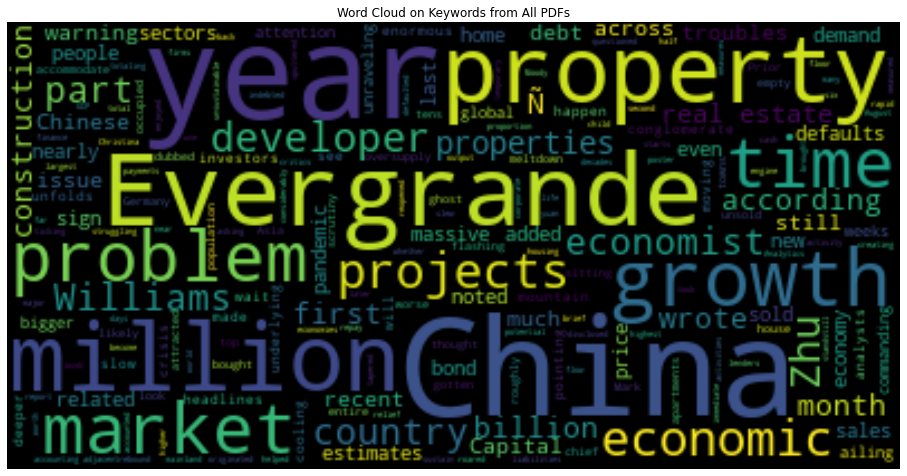

In [11]:
df = pd.DataFrame(allwords)
#ebook_text = pd.DataFrame(allwords)

wordstr = ' '.join(str(e) for e in allwords)
# ## 1. WordCloud

# Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(max_font_size=60).generate(alltext)

plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud on Keywords from All PDFs")
plt.show()

### Term Frequency - Inverse Term Frequency - FEATURE EXTRACTION

#### Term Frequency(TF), you just count the number of words occurred in each document.
#### IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
text_data = np.array(allwords)

feature_matrix = tfidf.fit_transform(text_data)
feature_matrix.toarray()

# Show tf-idf feature matrix
tfidf.get_feature_names()

['accommodate',
 'according',
 'accounted',
 'accounting',
 'across',
 'activity',
 'added',
 'adjacent',
 'ailing',
 'analyst',
 'analytics',
 'apartment',
 'asia',
 'asking',
 'attention',
 'attracted',
 'august',
 'back',
 'become',
 'bigger',
 'billion',
 'bomb',
 'bond',
 'bought',
 'brief',
 'brought',
 'builder',
 'buyer',
 'called',
 'capital',
 'cash',
 'chief',
 'child',
 'china',
 'chinese',
 'christina',
 'commanding',
 'compared',
 'completed',
 'conglomerate',
 'considerably',
 'construction',
 'cooling',
 'corporate',
 'could',
 'country',
 'creating',
 'crisis',
 'critic',
 'day',
 'debt',
 'decade',
 'decline',
 'deeper',
 'default',
 'defaulted',
 'demand',
 'developer',
 'directly',
 'disclosed',
 'dropped',
 'dubbed',
 'earlier',
 'economic',
 'economics',
 'economist',
 'economy',
 'edged',
 'empty',
 'engine',
 'enjoyed',
 'enormous',
 'entering',
 'entire',
 'era',
 'estate',
 'estimate',
 'even',
 'evergrande',
 'fallout',
 'far',
 'finance',
 'firm',
 'first',


In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jerryjosun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Frequency distribution plot

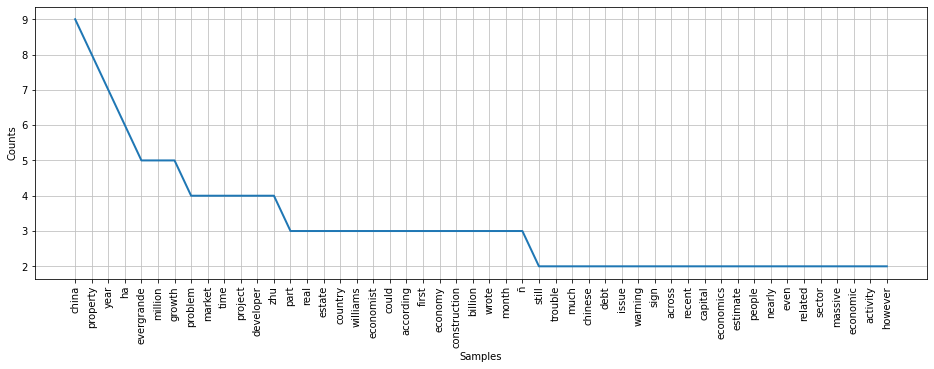

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
import nltk
from nltk.probability import FreqDist

fqdist = FreqDist(allwords)

freqdist = nltk.FreqDist(allwords)
plt.figure(figsize=(16,5))
freqdist.plot(50)


#### Most Frequent 10 words in all Text

In [15]:
freqdist.most_common(10)

[('china', 9),
 ('property', 8),
 ('year', 7),
 ('ha', 6),
 ('evergrande', 5),
 ('million', 5),
 ('growth', 5),
 ('problem', 4),
 ('market', 4),
 ('time', 4)]

#### Draw a bar chart with the count of the most common 20 words

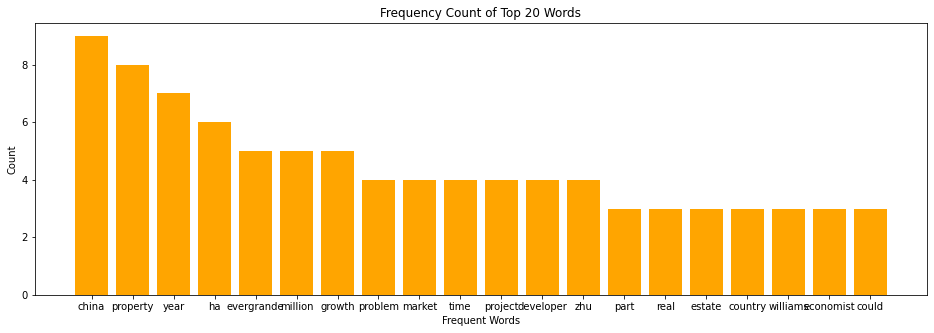

<Figure size 432x288 with 0 Axes>

In [16]:
x, y = zip(*freqdist.most_common(n=20))
plt.figure(figsize=(16,5))
plt.bar(range(len(x)), y, color = 'Orange', tick_label = y)
plt.xticks(range(len(x)), x)
plt.title('Frequency Count of Top 20 Words')
plt.xlabel('Frequent Words')
plt.ylabel('Count')
plt.show()
plt.savefig('Most Frequent 10 words.jpeg')

#### Least common 5 words

In [17]:
freqdist.most_common()[-5:]

[('setback', 1), ('builder', 1), ('directly', 1), ('impact', 1), ('buyer', 1)]

#### Get Bigrams from text & Calculate Frequency Distribution for Bigrams

In [18]:
bigrams = nltk.bigrams(allwords)
# Calculate Frequency Distribution for Bigrams
freq_bi = nltk.FreqDist(bigrams)

#### Draw a bar chart with the count of the most common 20 words

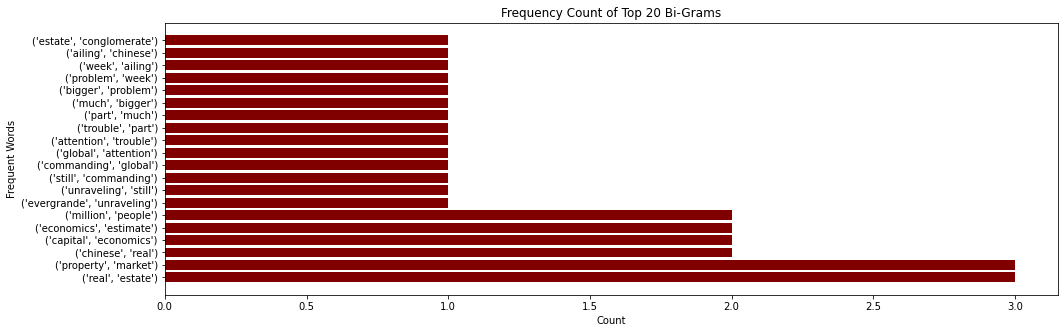

<Figure size 432x288 with 0 Axes>

In [19]:
x,y = zip(*freq_bi.most_common(n=20))
plt.figure(figsize=(16,5))
plt.barh(range(len(x)), y, color = 'Maroon')
#plt.barh(x,range(len(x)), color = 'Orange', tick_label = y)
#plt.xticks(range(len(x)), x)
y_pos = np.arange(len(x))
plt.yticks(y_pos, x)
plt.title('Frequency Count of Top 20 Bi-Grams')
plt.ylabel('Frequent Words')
plt.xlabel('Count')
plt.show()
plt.savefig('Most Frequent 20 Bi-Grams.jpeg')

#### Get Trigrams from text & Calculate Frequency Distribution for Trigrams
#### Print and plot most common Trigrams

In [20]:
trigrams = nltk.trigrams(allwords)
# Calculate Frequency Distribution for Trigrams
freq_tri = nltk.FreqDist(trigrams)

# Print and plot most common Trigrams
freq_tri.most_common(20)

[(('chinese', 'real', 'estate'), 2),
 (('capital', 'economics', 'estimate'), 2),
 (('evergrande', 'unraveling', 'still'), 1),
 (('unraveling', 'still', 'commanding'), 1),
 (('still', 'commanding', 'global'), 1),
 (('commanding', 'global', 'attention'), 1),
 (('global', 'attention', 'trouble'), 1),
 (('attention', 'trouble', 'part'), 1),
 (('trouble', 'part', 'much'), 1),
 (('part', 'much', 'bigger'), 1),
 (('much', 'bigger', 'problem'), 1),
 (('bigger', 'problem', 'week'), 1),
 (('problem', 'week', 'ailing'), 1),
 (('week', 'ailing', 'chinese'), 1),
 (('ailing', 'chinese', 'real'), 1),
 (('real', 'estate', 'conglomerate'), 1),
 (('estate', 'conglomerate', 'ha'), 1),
 (('conglomerate', 'ha', 'made'), 1),
 (('ha', 'made', 'headline'), 1),
 (('made', 'headline', 'investor'), 1)]

#### Draw a bar chart with the count of the most common 50 words

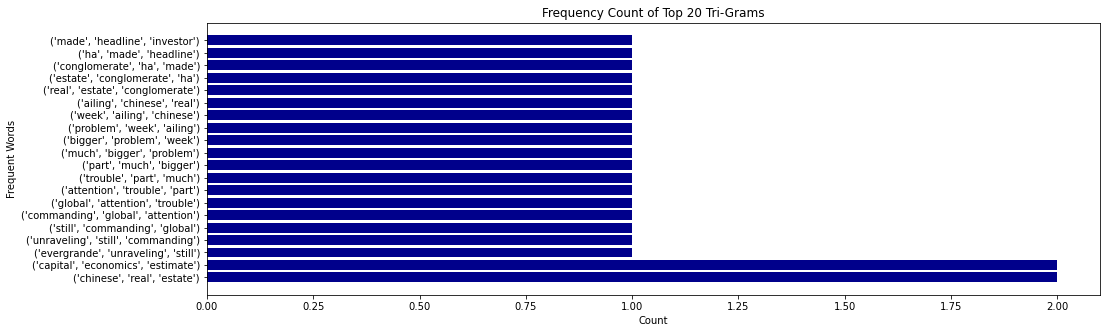

<Figure size 432x288 with 0 Axes>

In [21]:
x,y = zip(*freq_tri.most_common(n=20))
plt.figure(figsize=(16,5))
plt.barh(range(len(x)), y, color = 'Darkblue')
#plt.barh(x,range(len(x)), color = 'Orange', tick_label = y)
#plt.xticks(range(len(x)), x)
y_pos = np.arange(len(x))
plt.yticks(y_pos, x)
plt.title('Frequency Count of Top 20 Tri-Grams')
plt.ylabel('Frequent Words')
plt.xlabel('Count')
plt.show()
plt.savefig('Most Frequent 20 Tri-Grams.jpeg')

#### Word Length Distribution Plot

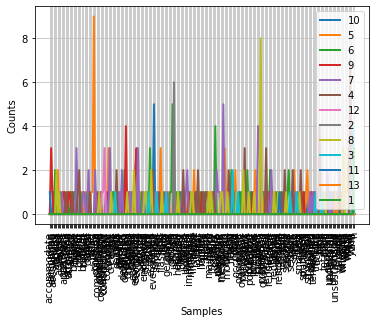

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
#### This plot is word length on x-axis vs number of words of that length on the y-axis. This plot helps to visualise the composition of different word length in the text corpus.

from nltk.probability import ConditionalFreqDist

cfdist = ConditionalFreqDist((len(word), word) for word in allwords )
cfdist.plot()

#### T-SNE Corpus Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


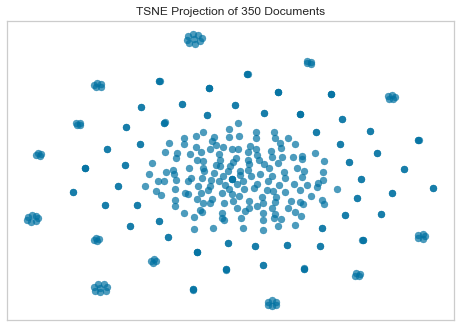

In [23]:
#  Visualizing document similarity is to use t-distributed stochastic neighbor embedding

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()

docs   = tfidf.fit_transform(allwords)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts= cv.fit_transform(df[0])

### Generating Sentences

In [24]:
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

### Doing Similarity Matrix Between Sentences

In [25]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [26]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

### Function for Generating Summary (Extraction Based Summary)

In [27]:
def generate_summary(file_name, top_n=5):
    nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize text
    print("Summarize Text: \n", ". ".join(summarize_text))

In [28]:
df2 = df

In [29]:
df2.columns = ['Text']
df2

,Text
0,evergrande
1,unraveling
2,still
3,commanding
4,global
...,...
345,directly
346,impact
347,buyer
348,according


### Calculating SUBJECTIVITY and POLARITY of text extracted

In [30]:
from textblob import TextBlob as TB
# calculate subjectivity and Polarity to understand emotions in tweets
# function for subjectivity
def calc_subject(Text):
    return TB(Text).sentiment.subjectivity
 
# function for Polarity
def calc_polarity(Text):
    return TB(Text).sentiment.polarity
 
df2['Subjectivity'] = df2.Text.apply(calc_subject)
df2['Polarity'] = df2.Text.apply(calc_polarity)

In [31]:
df2.head(15)# checking on dataset

,Text,Subjectivity,Polarity
0,evergrande,0.0,0.0
1,unraveling,0.0,0.0
2,still,0.0,0.0
3,commanding,0.0,0.0
4,global,0.0,0.0
5,attention,0.0,0.0
6,trouble,0.2,-0.2
7,part,0.0,0.0
8,much,0.2,0.2
9,bigger,0.5,0.0


#### Segregating Texts based on their sentiment (polarity) SENTIMENT ANALYSIS

In [32]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df2['Analysis'] = df2.Polarity.apply(sentiment)

In [33]:
df2.head(15)

,Text,Subjectivity,Polarity,Analysis
0,evergrande,0.0,0.0,Netural
1,unraveling,0.0,0.0,Netural
2,still,0.0,0.0,Netural
3,commanding,0.0,0.0,Netural
4,global,0.0,0.0,Netural
5,attention,0.0,0.0,Netural
6,trouble,0.2,-0.2,Negative
7,part,0.0,0.0,Netural
8,much,0.2,0.2,Positive
9,bigger,0.5,0.0,Netural


#### performing visualisation on sentiment

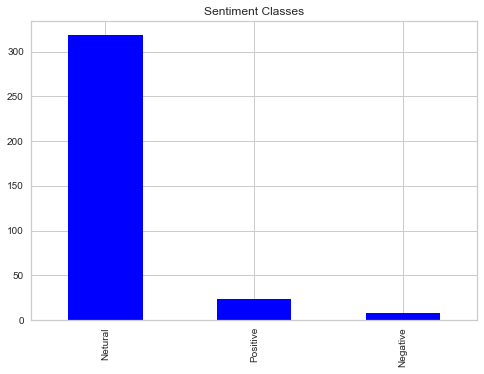

In [34]:
df2.Analysis.value_counts().plot(kind='bar', color='blue')
plt.title('Sentiment Classes')
plt.show()

#### SCATTER PLOT 

Text(0, 0.5, 'Subjectivity')

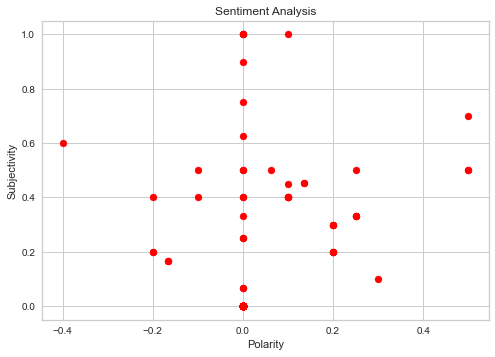

In [35]:
plt.scatter(df2.Polarity, df2.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

### the percentage of different sentiment's class

In [36]:
# Create
File_sentiment = pd.DataFrame(df2.Analysis.value_counts(normalize=True)*100)
 
# calculating total count of sentiment
File_sentiment['Total'] = df2.Analysis.value_counts()

In [37]:
File_sentiment

,Analysis,Total
Netural,90.857143,318
Positive,6.857143,24
Negative,2.285714,8


### WORD CLOUD for the extracted text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jerryjosun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


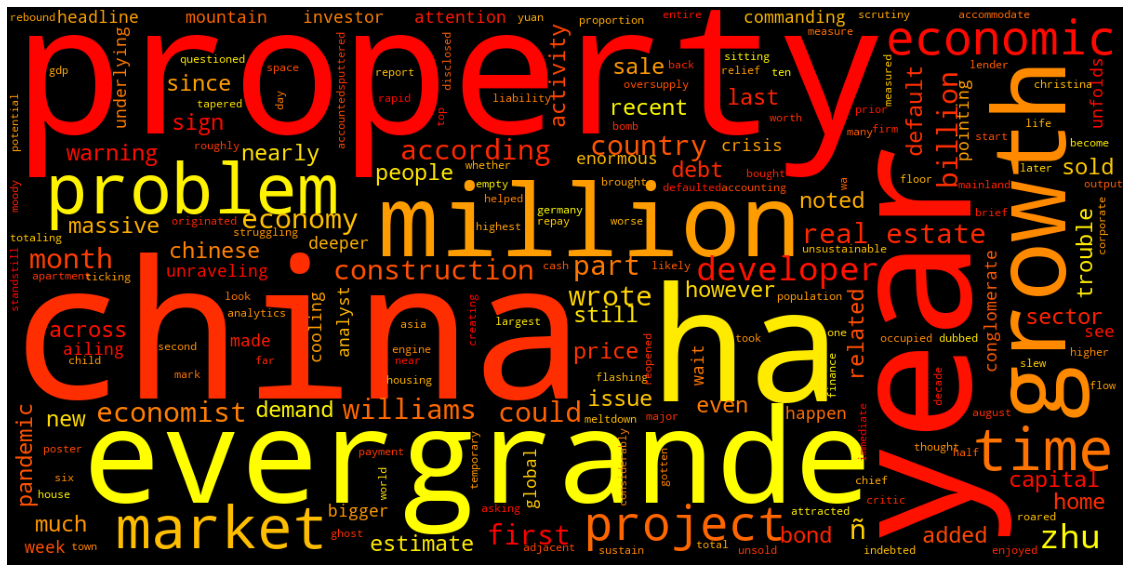

In [38]:
from wordcloud import WordCloud as WC
# loading stop words 
nltk.download('stopwords')
st_wd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all texts
every_word = ' '.join([txts for txts in df2['Text']])
 
# word cloud function
def Word_cloud(data, mask=None):
    Cloud = WC(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=st_wd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.show()
    
# plotting the word cloud
Word_cloud(every_word)

### BUILDING MODEL USING NAIVE_BAYES

In [39]:
df2_analysis = df2[(df2.Analysis == 'Positive') | (df2.Analysis =='Negative') | (df2.Analysis == 'Neutral') ]

In [40]:
X = df2_analysis['Text']
y = df2_analysis['Analysis']

In [41]:
X.shape

(32,)

In [42]:
y.shape

(32,)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [46]:
predictions = nb.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[0 3]
 [0 7]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
    Positive       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



### USING PIPELINE METHOD 
#### Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text

In [48]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [49]:
X = df2_analysis['Text']
y = df2_analysis['Analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [50]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [51]:
predictions1 = pipeline.predict(X_test)

print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[0 3]
 [0 7]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
    Positive       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



### Generating Summary for PDF file

In [52]:
alltext = ""
i = 0
for file in os.listdir(directory):
    i += 1
    if not file.endswith(".pdf"):
        continue
    pdf_filename =  os.path.join(directory,file)  
       
    #open file
    pdfFileObj = open(pdf_filename,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    num_pages = pdfReader.numPages
    #Read content of PDF as Text
    count = 0
    text = ""
    while count < num_pages:
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()
    if text != "":
       text = text
    alltext = alltext + text

In [53]:
with open("e_book.txt","w") as file:
    file.write(alltext + "\n")

### ACTUAL EXTRACTED TEXT , RANKED SENTENCES & SUMMARY OF TEXT EXTRACTED

In [54]:
generate_summary( "e_Book.txt", 5)

Evergrande's unraveling is still commanding global attention, but its troubles are part of a much bigger problem
For weeks, the ailing Chinese real estate conglomerate has made headlines as investors wait to see what will happen to its enormous mountain of debt
As the slow-moving crisis unfolds, analysts are pointing to a deeper underlying issue: China's property market is cooling off after years of oversupply
The warning signs have been flashing for some time
Prior to Evergrande's meltdown, tens of millions of apartments were thought to be sitting empty across the country
In recent years, the problem has only gotten worse
Mark Williams, chief Asia economist at Capital Economics, estimates that China still has about 30 million unsold properties, which could house 80 million people
That's nearly the entire population of Germany
On top of that, about 100 million properties have likely been bought but not occupied, which could accommodate roughly 260 million people, according to Capital E

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jerryjosun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
